In [37]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Cardiotocographic.csv")

In [39]:
df = pd.read_csv("Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [43]:
# We can observe that there are null values present in the data. We should either drop them or imputate them according to our needs.

In [45]:
#Describe() function shows us all the measures of central tendencies such as mean, median, standard deviation and Inter-Quartile range.
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [49]:
df.duplicated().sum()

2

In [51]:
# There are 2 duplicate rows. As there are 2 duplicate rows we should drop them.

In [53]:
df.drop_duplicates(inplace = True)

In [55]:
df.duplicated().sum()

0

In [57]:
# As we can see now there are no duplicate values.

In [59]:
df.isna().sum().sum()

167

In [61]:
# Now let us treat Null values.

In [63]:
# We can use mean or median according to presence of outliers.
df1 = df.fillna(df.mean)

In [65]:
df1.isna().sum().sum()

0

In [69]:
# Detecting Outliers
Q1 = df['LB'].quantile(0.25)
Q3 = df['LB'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = df[(df['LB']<lower_bound) | (df['LB']>upper_bound)].LB.value_counts().sum()
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['LB']<lower_bound) | (df['LB']>upper_bound)].LB
print(outliers)

Outlier count is 10
134      52.000000
411     214.000000
610     214.000000
612     214.000000
785      52.000000
1027     51.842487
1103    214.000000
1406    214.000000
1504    214.000000
1834     52.188547
Name: LB, dtype: float64


In [71]:
Q1 = df['AC'].quantile(0.25)
Q3 = df['AC'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = outliers = df[(df['AC']<lower_bound) | (df['AC']>upper_bound)].shape[0]
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['AC']<lower_bound) | (df['AC']>upper_bound)].AC
print(f"Outliers are:  \n {outliers}")

Outlier count is 40
Outliers are:  
 8       0.038567
23     -0.019284
83      0.014706
85      0.014230
116     0.038567
157    -0.019284
181     0.017241
496     0.014178
497     0.015552
498     0.015258
500     0.014178
501     0.014726
526     0.015013
529     0.019284
530     0.015590
531     0.016423
552     0.015782
616     0.014806
626     0.038567
630     0.017391
681    -0.019284
1000    0.014907
1066    0.014303
1093    0.015642
1094    0.017668
1096    0.017341
1231    0.038567
1248    0.017857
1311    0.014320
1312    0.015113
1687    0.014400
1752   -0.019284
1858    0.015907
1859    0.017073
1860    0.015166
1861    0.014444
1862    0.016000
1866    0.014842
1918    0.038567
2060    0.038567
Name: AC, dtype: float64


In [73]:
Q1 = df['FM'].quantile(0.25)
Q3 = df['FM'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = outliers = df[(df['FM']<lower_bound) | (df['FM']>upper_bound)].FM.value_counts().sum()
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['FM']<lower_bound) | (df['FM']>upper_bound)].FM
print(outliers)

Outlier count is 347
12      0.072335
13      0.222390
14      0.407840
15      0.380223
16      0.441400
          ...   
2083    0.008861
2099    0.008653
2100    0.009840
2101    0.009357
2121    0.961268
Name: FM, Length: 347, dtype: float64


In [75]:
Q1 = df['UC'].quantile(0.25)
Q3 = df['UC'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = outliers = df[(df['UC']<lower_bound) | (df['UC']>upper_bound)].FM.value_counts().sum()
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['UC']<lower_bound) | (df['UC']>upper_bound)].UC
print(outliers)

Outlier count is 13
134     0.029851
543     0.029851
793    -0.014925
917     0.029851
1164    0.014925
1396   -0.014925
1469   -0.014925
1593    0.029936
1671    0.029851
1717    0.030002
1868   -0.014925
1902    0.013861
1903    0.014374
Name: UC, dtype: float64


In [77]:
Q1 = df['DL'].quantile(0.25)
Q3 = df['DL'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = outliers = df[(df['DL']<lower_bound) | (df['DL']>upper_bound)].FM.value_counts().sum()
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['DL']<lower_bound) | (df['DL']>upper_bound)].UC
print(outliers)

Outlier count is 125
5       0.010493
6       0.012623
28      0.000834
29      0.000000
30      0.001702
          ...   
2045    0.008889
2046    0.008491
2047    0.006579
2048    0.008032
2111    0.008696
Name: UC, Length: 125, dtype: float64


In [79]:
Q1 = df['DS'].quantile(0.25)
Q3 = df['DS'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = outliers = df[(df['DS']<lower_bound) | (df['DS']>upper_bound)].FM.value_counts().sum()
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['DS']<lower_bound) | (df['DS']>upper_bound)].UC
print(outliers)

Outlier count is 120
33      0.000800
38      0.003745
69      0.004992
84      0.001412
113     0.005882
          ...   
2061    0.004575
2075    0.000876
2080    0.001001
2088    0.006180
2112    0.006431
Name: UC, Length: 120, dtype: float64


In [81]:
Q1 = df['DP'].quantile(0.25)
Q3 = df['DP'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = outliers = df[(df['DP']<lower_bound) | (df['DP']>upper_bound)].FM.value_counts().sum()
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['DP']<lower_bound) | (df['DP']>upper_bound)].UC
print(outliers)

Outlier count is 284
5       0.010493
6       0.012623
14      0.004170
15      0.004178
17      0.003049
          ...   
2073    0.000732
2102    0.007238
2110    0.008219
2111    0.008696
2112    0.006431
Name: UC, Length: 284, dtype: float64


In [83]:
Q1 = df['ASTV'].quantile(0.25)
Q3 = df['ASTV'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = outliers = df[(df['ASTV']<lower_bound) | (df['ASTV']>upper_bound)].FM.value_counts().sum()
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['ASTV']<lower_bound) | (df['ASTV']>upper_bound)].UC
print(outliers)

Outlier count is 10
131     0.000000
232     0.000000
345     0.000000
504     0.004127
1014    0.004509
1027    0.005420
1195    0.005342
1578    0.002994
1941    0.006233
2008    0.008373
Name: UC, dtype: float64


In [85]:
Q1 = df['MSTV'].quantile(0.25)
Q3 = df['MSTV'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = outliers = df[(df['MSTV']<lower_bound) | (df['MSTV']>upper_bound)].FM.value_counts().sum()
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['MSTV']<lower_bound) | (df['MSTV']>upper_bound)].UC
print(outliers)

Outlier count is 80
5       0.010493
6       0.012623
28      0.000834
29      0.000000
30      0.001702
          ...   
2024    0.005008
2034    0.006438
2048    0.008032
2049    0.007151
2051    0.005283
Name: UC, Length: 80, dtype: float64


In [87]:
Q1 = df['ALTV'].quantile(0.25)
Q3 = df['ALTV'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = outliers = df[(df['ALTV']<lower_bound) | (df['ALTV']>upper_bound)].FM.value_counts().sum()
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['ALTV']<lower_bound) | (df['ALTV']>upper_bound)].UC
print(outliers)

Outlier count is 318
0       0.000000
24      0.003311
25      0.000000
27      0.000000
53      0.000000
          ...   
2106    0.007675
2114    0.007009
2115    0.006424
2116    0.003968
2125    0.008078
Name: UC, Length: 318, dtype: float64


In [89]:
Q1 = df['MLTV'].quantile(0.25)
Q3 = df['MLTV'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
Outlier_count = outliers = df[(df['MLTV']<lower_bound) | (df['MLTV']>upper_bound)].FM.value_counts().sum()
print(f"Outlier count is {Outlier_count}")
outliers = df[(df['MLTV']<lower_bound) | (df['MLTV']>upper_bound)].UC
print(outliers)

Outlier count is 81
3       0.007742
10      0.000834
11      0.001014
33      0.000800
35      0.007273
          ...   
1750    0.001600
1800    0.003717
1818    0.007049
1882    0.006422
2033    0.006734
Name: UC, Length: 81, dtype: float64


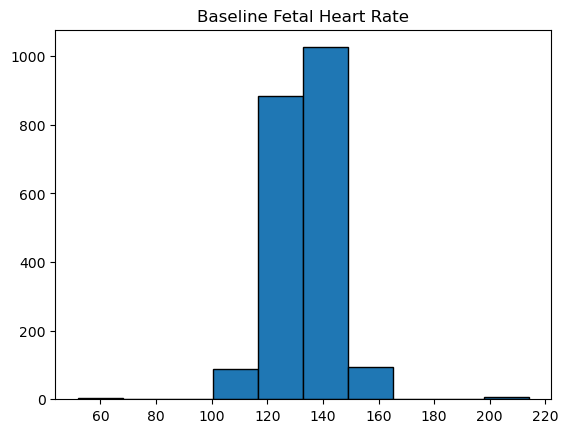

In [129]:
plt.hist(x=df['LB'],edgecolor='black')
plt.title('Baseline Fetal Heart Rate')
plt.show()

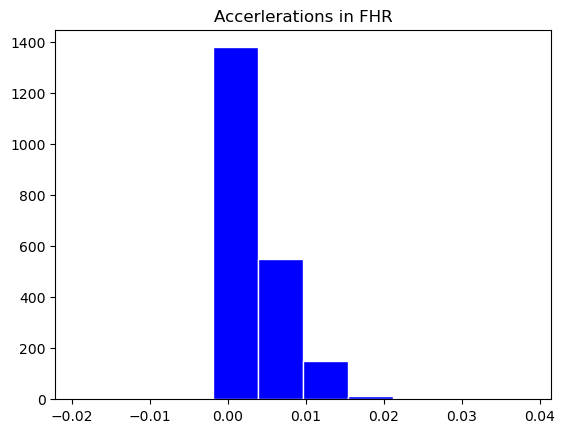

In [135]:
plt.hist(x = df['AC'],color = 'blue',edgecolor='white')
plt.title('Accerlerations in FHR')
plt.show()

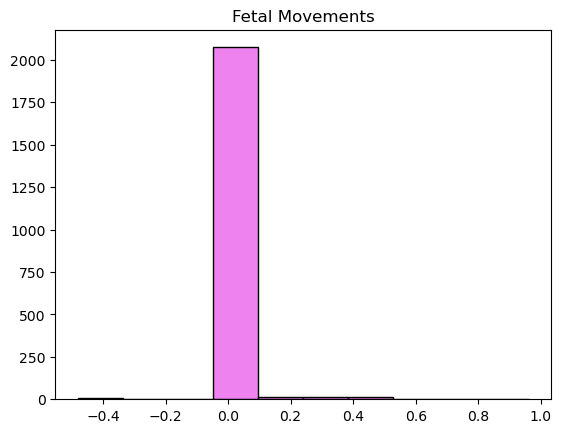

In [191]:
plt.hist(x = df['FM'],color='violet',edgecolor='black' )
plt.title('Fetal Movements')
plt.show()

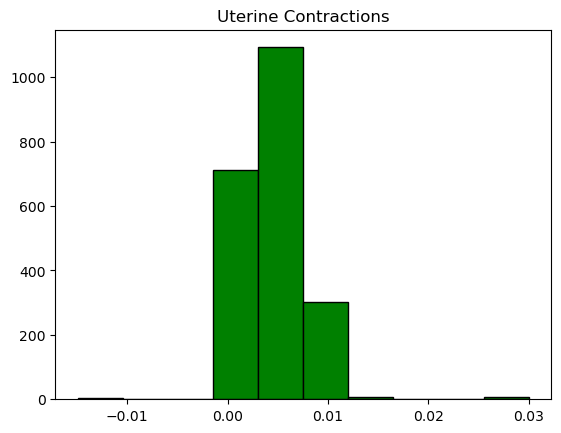

In [141]:
plt.hist(x = df['UC'],color='green',edgecolor='black')
plt.title('Uterine Contractions')
plt.show()

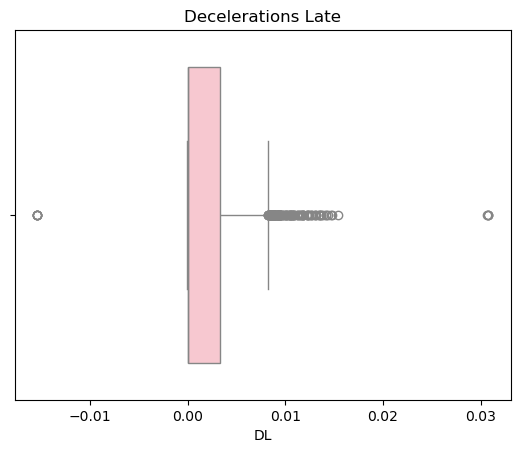

In [189]:
sns.boxplot(x=df['DL'],color='pink')
plt.title('Decelerations Late')
plt.show()

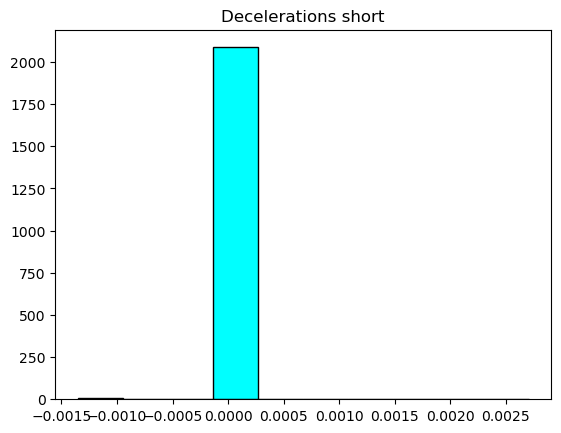

In [153]:
plt.hist(x=df['DS'],color='cyan',edgecolor='black')
plt.title('Decelerations short')
plt.show()

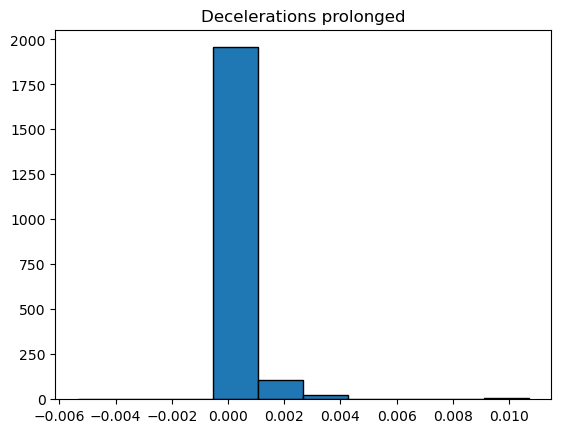

In [155]:
plt.hist(x=df['DP'],edgecolor='black')
plt.title('Decelerations prolonged')
plt.show()

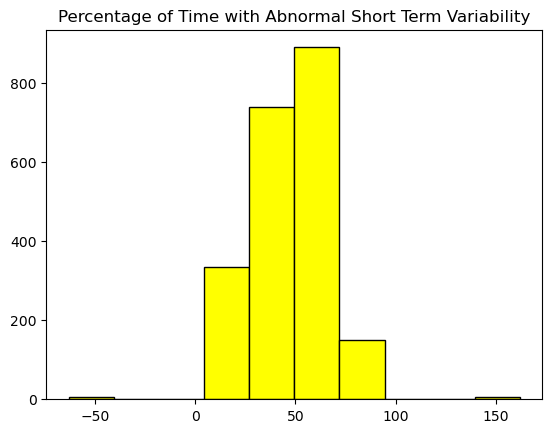

In [159]:
plt.hist(x=df['ASTV'],color='yellow',edgecolor='black')
plt.title('Percentage of Time with Abnormal Short Term Variability')
plt.show()

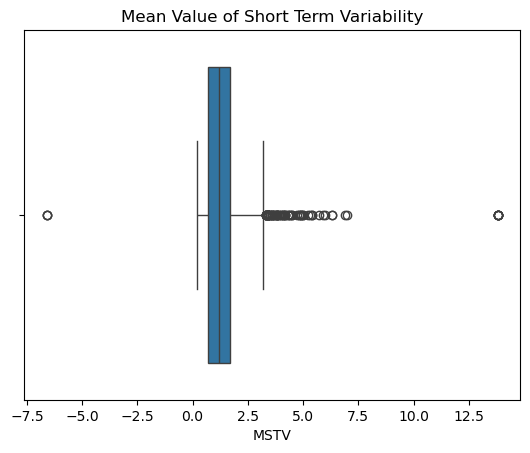

In [183]:
sns.boxplot(x=df['MSTV'])
plt.title('Mean Value of Short Term Variability')
plt.show()

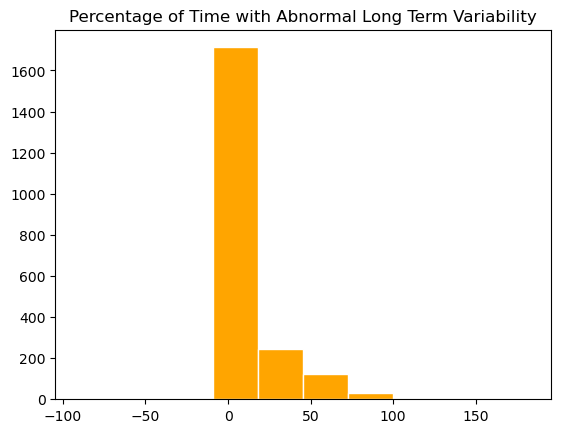

In [171]:
plt.hist(x=df['ALTV'],color='orange',edgecolor='white')
plt.title('Percentage of Time with Abnormal Long Term Variability')
plt.show()

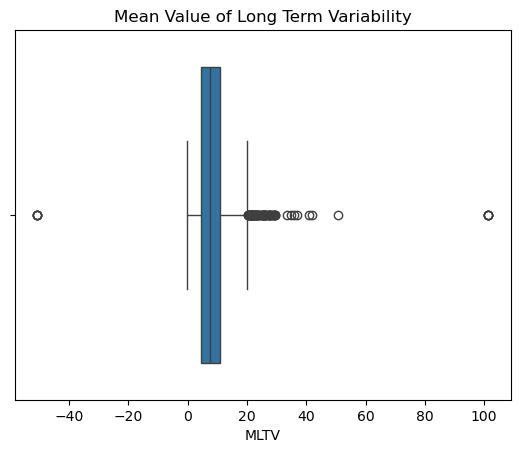

In [181]:
sns.boxplot(x=df['MLTV'])
plt.title('Mean Value of Long Term Variability')
plt.show()

In [ ]:
# To create Bar charts or Pie charts we need categorical data. 
# In this data there is no categorical data. Hence we cannot plot bar charts or pie charts.

In [ ]:
# Lets create Scatter plots for various pairs of variables.

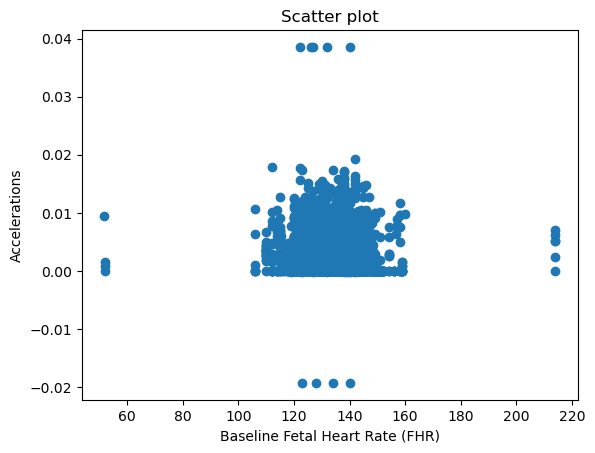

In [348]:
plt.scatter(x=df["LB"],y=df['AC'])
plt.title('Scatter plot')
plt.xlabel('Baseline Fetal Heart Rate (FHR)')
plt.ylabel('Accelerations')
plt.show()

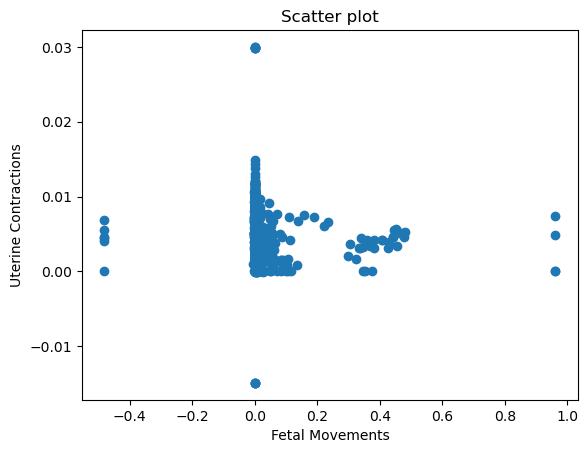

In [207]:
plt.scatter(x=df["FM"],y=df['UC'])
plt.title('Scatter plot')
plt.xlabel('Fetal Movements')
plt.ylabel("Uterine Contractions")
plt.show()

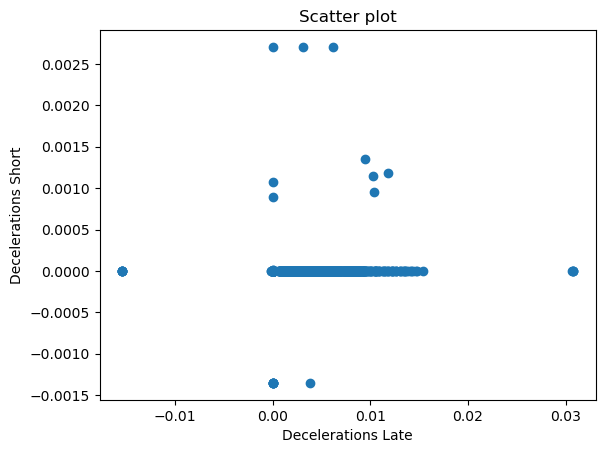

In [209]:
plt.scatter(x=df["DL"],y=df['DS'])
plt.title('Scatter plot')
plt.xlabel('Decelerations Late')
plt.ylabel("Decelerations Short")
plt.show()

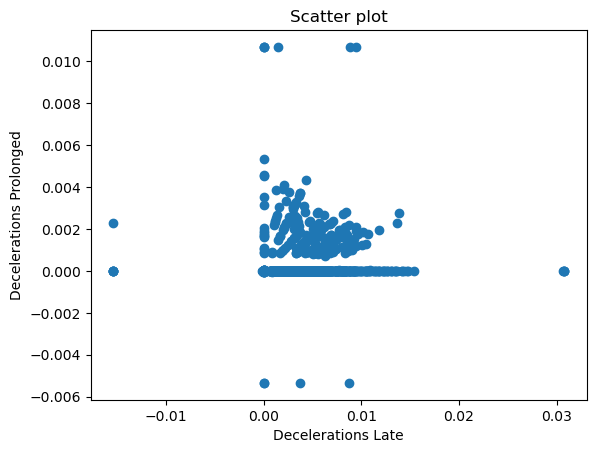

In [211]:
plt.scatter(x=df["DL"],y=df['DP'])
plt.title('Scatter plot')
plt.xlabel('Decelerations Late')
plt.ylabel("Decelerations Prolonged")
plt.show()

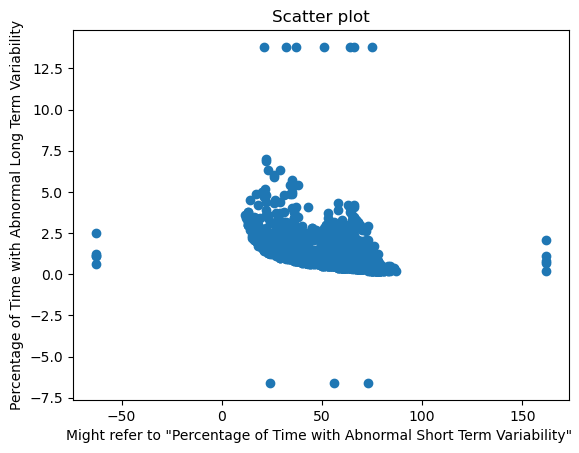

In [213]:
plt.scatter(x=df["ASTV"],y=df['MSTV'])
plt.title('Scatter plot')
plt.xlabel('Might refer to "Percentage of Time with Abnormal Short Term Variability" ')
plt.ylabel("Percentage of Time with Abnormal Long Term Variability")
plt.show()

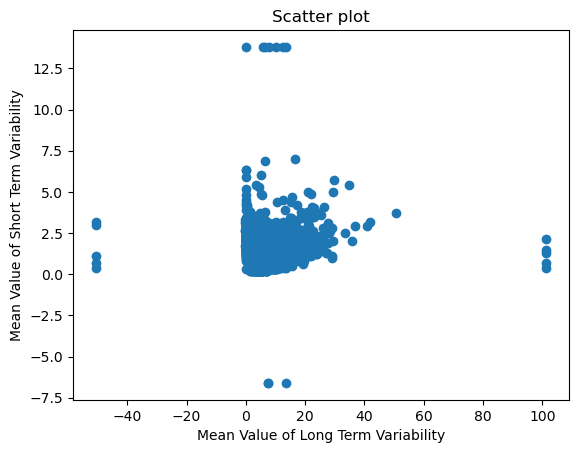

In [217]:
plt.scatter(x=df["MLTV"],y=df['MSTV'])
plt.title('Scatter plot')
plt.xlabel('Mean Value of Long Term Variability')
plt.ylabel("Mean Value of Short Term Variability")
plt.show()

In [219]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.064452,0.018810,-0.167012,-0.126981,-0.005439,-0.047726,0.242435,-0.170134,0.210955,-0.003225,-0.118375,0.237112,0.132008
AC,-0.064452,1.000000,0.009407,0.071700,-0.093641,-0.033632,-0.084644,-0.231725,0.134423,-0.271554,-0.106308,0.238422,0.032399,-0.317113
FM,0.018810,0.009407,1.000000,-0.053386,0.009641,0.029899,0.121259,-0.032838,0.017061,-0.012005,-0.006157,0.097133,-0.018410,0.073997
UC,-0.167012,0.071700,-0.053386,1.000000,0.189737,-0.006957,0.070504,-0.182379,0.189685,-0.227881,-0.048862,0.106787,-0.067098,-0.185953
DL,-0.126981,-0.093641,0.009641,0.189737,1.000000,0.058625,0.145338,-0.069907,0.410216,-0.187275,-0.165494,0.409793,-0.023838,0.025179
DS,-0.005439,-0.033632,0.029899,-0.006957,0.058625,1.000000,0.004282,0.008441,0.016165,-0.004406,0.034366,0.040831,-0.015408,0.065399
DP,-0.047726,-0.084644,0.121259,0.070504,0.145338,0.004282,1.000000,0.038076,0.119911,-0.077865,-0.113993,0.175240,-0.130510,0.294416
ASTV,0.242435,-0.231725,-0.032838,-0.182379,-0.069907,0.008441,0.038076,1.000000,-0.293820,0.357310,-0.219922,-0.208439,-0.011367,0.422515
MSTV,-0.170134,0.134423,0.017061,0.189685,0.410216,0.016165,0.119911,-0.293820,1.000000,-0.291979,0.028807,0.435563,-0.036849,-0.095143
ALTV,0.210955,-0.271554,-0.012005,-0.227881,-0.187275,-0.004406,-0.077865,0.357310,-0.291979,1.000000,-0.107475,-0.346960,0.036552,0.365708


In [221]:
#corr() functions gives us the correlations table so that we can understand relationships between variables very easily.

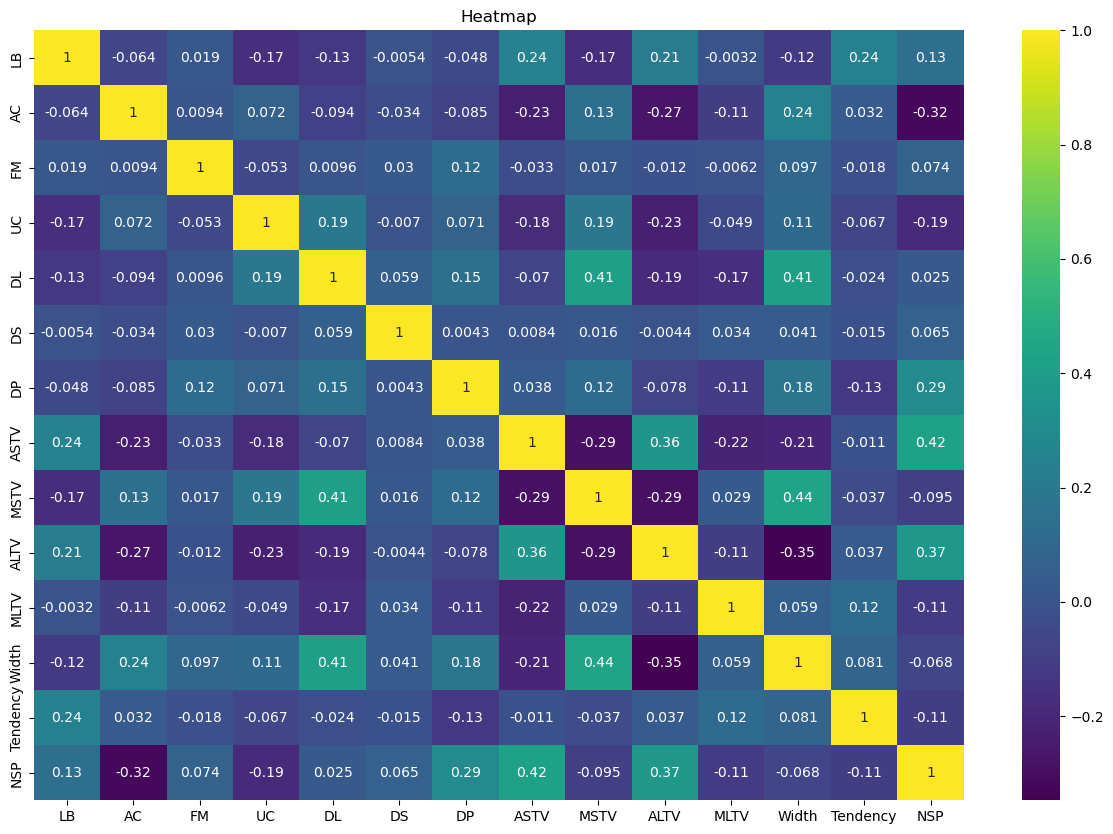

In [249]:
#Lets create a heatmap for the data frame to understand relationships between variables.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap')
plt.show()

In [251]:
# As we can see there is moderate to little correlation between any of the variables. 

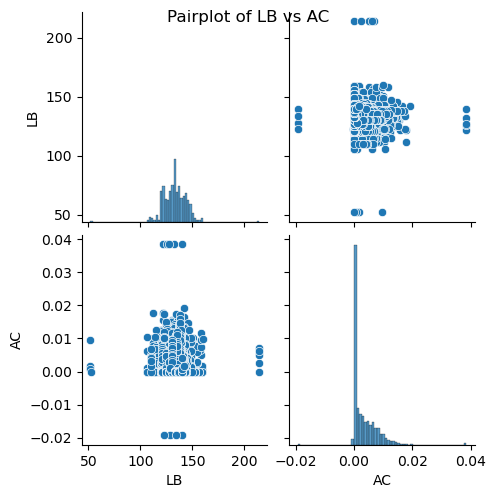

In [288]:
# Lets plot some pairplots 
sns.pairplot(df.iloc[:,0:2])
plt.suptitle("Pairplot of LB vs AC")
plt.show()

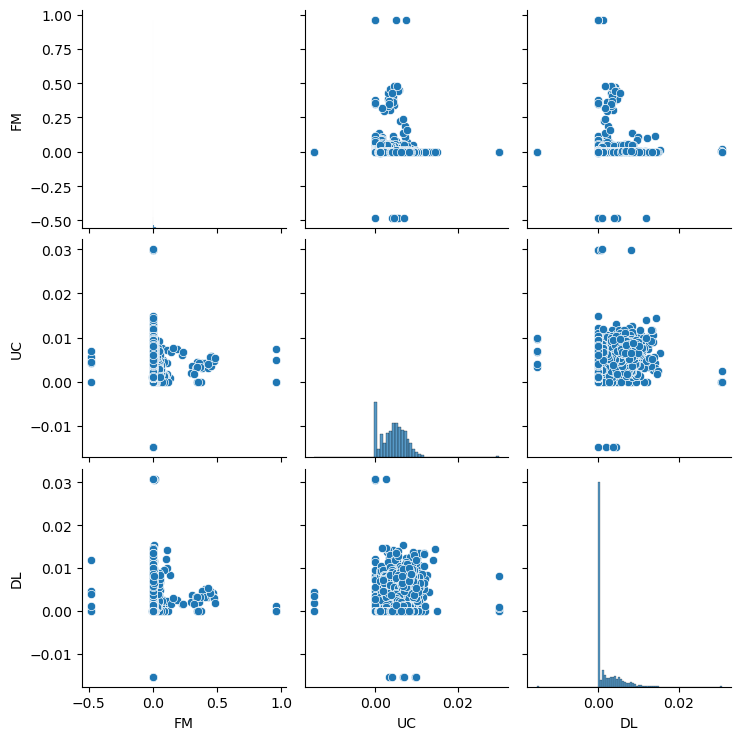

In [292]:
sns.pairplot(df.loc[:,'FM':'DL'])
plt.show()

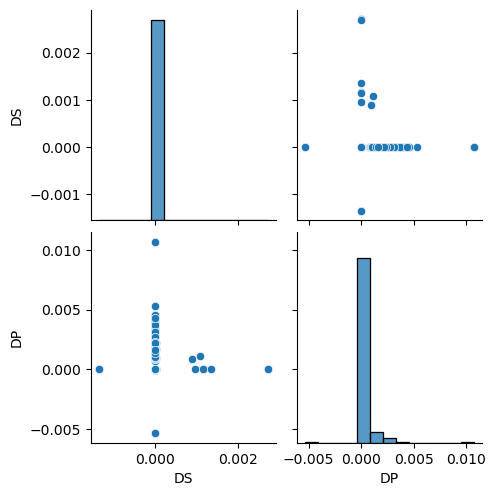

In [302]:
sns.pairplot(df.iloc[:,5:7])
plt.show()

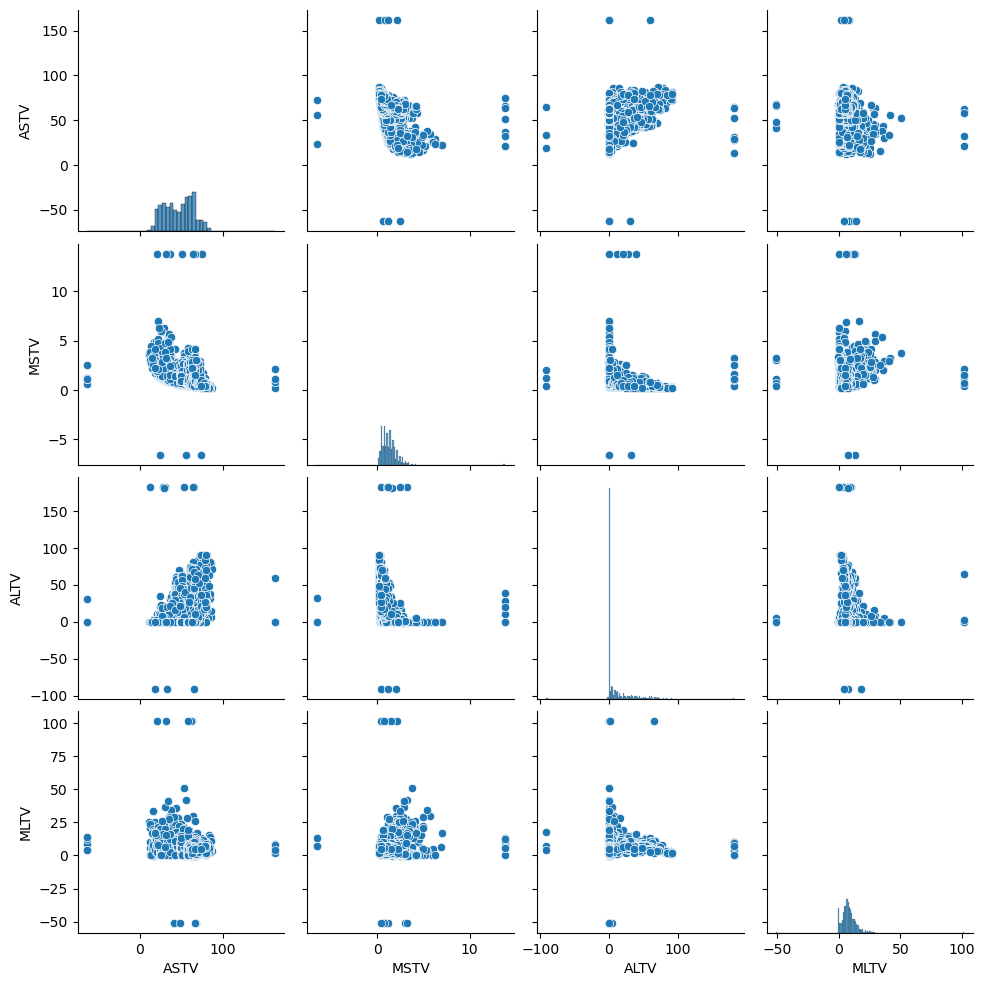

In [304]:
sns.pairplot(df.loc[:,'ASTV':'MLTV'])
plt.show()

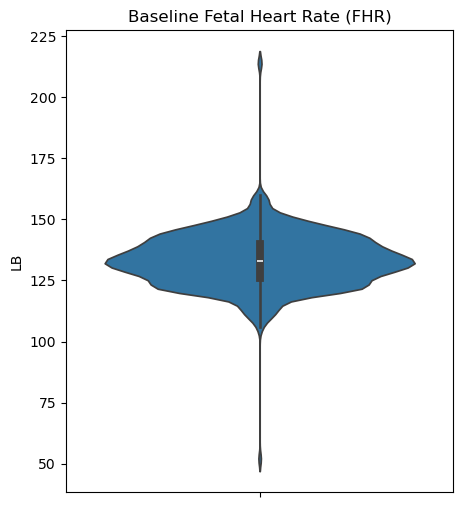

In [344]:
plt.figure(figsize=(5,6))
sns.violinplot(df['LB'])
plt.title('Baseline Fetal Heart Rate (FHR)')
plt.show()

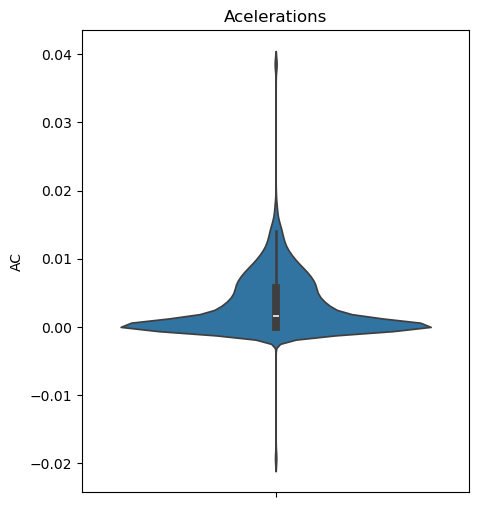

In [342]:
plt.figure(figsize=(5,6))
sns.violinplot(df['AC'])
plt.title("Acelerations")
plt.show()

<Axes: ylabel='Width'>

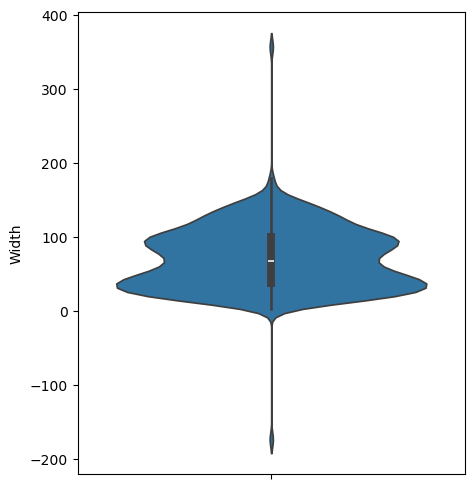

In [340]:
plt.figure(figsize=(5,6))
sns.violinplot(df['Width'])

In [ ]:
#There is no temporal data available, Hence we cannot look for trends or patterns.

In [ ]:
# Key findings in the data
''' 
This dataset contains numerical variables which are:
LB(Baseline Fetal Heart Rate): The mean of FHR is approximately 133 beats per minute with a standard deviaton of 11 bpm.
Most Lb values fall within the range of 120-150 bpm. There are few outliers below 80 bpm and 180 bpm.
AC(Accelerations): Mean of Accelerations is very small indicating minimal acceleration activity in fetal heart rate monitoring.
FM(Fetal Movements): The mean of Fetal Movements is low but its standard deviation is relatively high.
UC(Uterine Contractions): The mean of Uterine contractions is low meaning minimal activity while monitoring.
Decelerations(DL,DS,DP): Decelerations have very low mean values.
Short Term Variability(ASTV): The mean of short term variability is aproximately is 47, with a wide range of values. It also has high standard deviation.
Mean Value of Short Term Variability (MSTV): The mean of Mstv is approximately 1.36 bpm with a stndard deviation of 1.17 bpm.
Long Term Variability (ALTV, MLTV): Both ALTV and MLTV have high mean values indicating variability in fetal heart rate patterns.
Width: The mean of Width is approximately 70, with relatively high standard deviation. It also has some outliers.
'''